In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 split
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# from statsmodels.formula.api import ols
# from sklearn.feature_selection import RFE

# from sklearn.tree import DecisionTreeRegressor
# # 앙상블 모델
# from sklearn.ensemble import GradientBoostingRegressor as GBR
# from sklearn.ensemble import RandomForestRegressor as RFR

# from sklearn.model_selection import GridSearchCV

# # 평가함수
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 폰트 설정
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df_raw = pd.read_csv("Data/직무능력평가.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   EVAL       30 non-null     int64
 1   DISSATIS   30 non-null     int64
 2   PRIVILEGE  30 non-null     int64
 3   CHANCE     30 non-null     int64
 4   ADVANCE    30 non-null     int64
 5   CRITISM    30 non-null     int64
 6   PROMOTION  30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


In [4]:
df_raw_y = df_raw["EVAL"]
df_raw_x = df_raw.drop("EVAL", axis=1)
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


## 2) 선형관계 확인: 산점도 및 상관계수

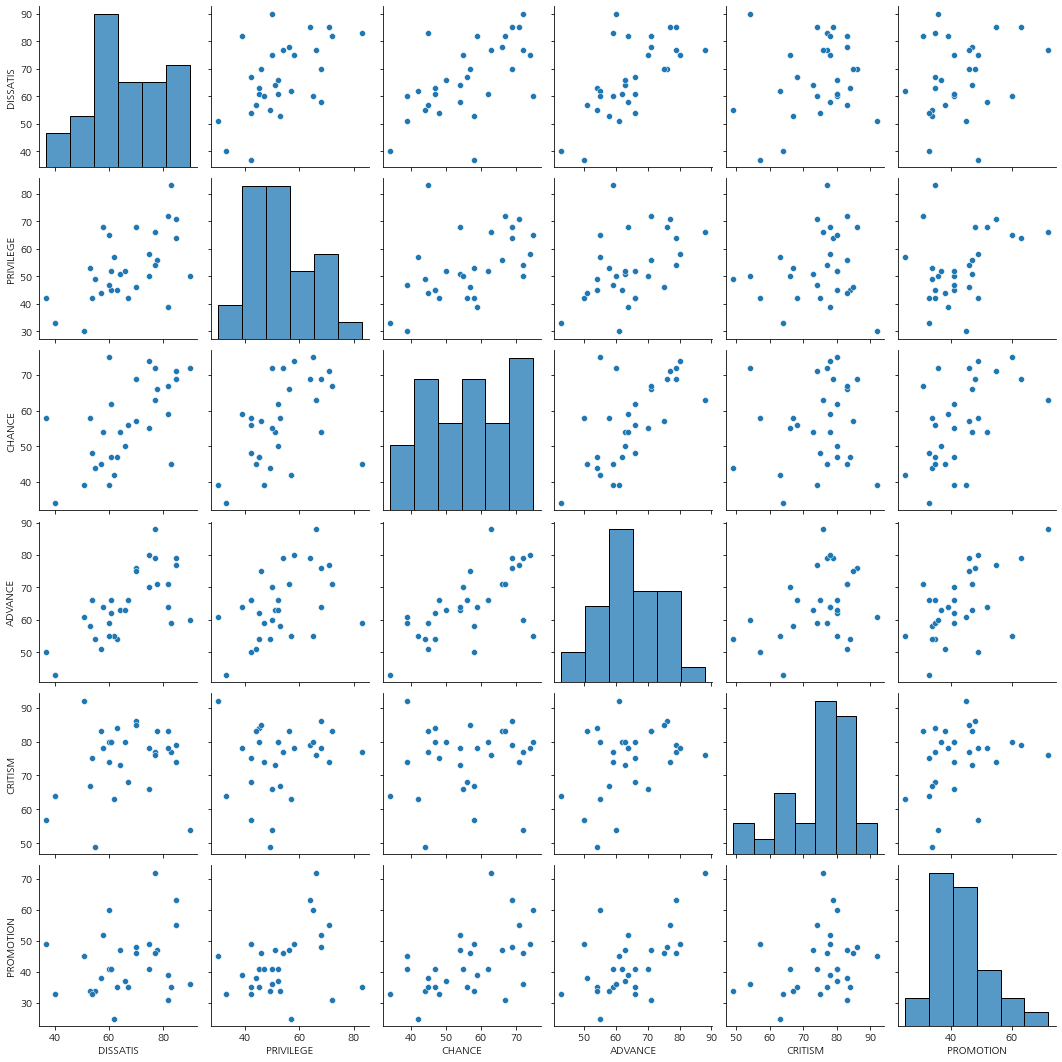

In [6]:
# x들간의 관계분석
sns.pairplot(df_raw_x)

In [7]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


- DISSATIS와 세 개의 변수, CHANCE와 AVANCE 등에 높은 상관관계를 보인다.

## 3) 데이터 확인 및 scailing

In [10]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [13]:
# 변수 이름 저장
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형태 확인
print("Scaled Data: \n {}".format(nd_scaled[:5].round(3)))
print("Shape: \n {}".format(nd_scaled.shape))

Scaled Data: 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape: 
 (30, 6)


In [15]:
# StandScale한 값 데이터프레임으로 변환
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [17]:
# Scale 변환 데이터 요약 통계량

df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


## 4) 주성분 분석
- 변수가 6개이므로, 주성분1~주성분6 생성 및 저장

In [18]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA Data: \n {}".format(nd_pca[:5].round(3)))
print("Shape: \n {}".format(nd_pca.shape))

PCA Data: 
 [[ 1.676 -2.739 -0.128 -0.503  0.243  0.226]
 [ 0.218 -0.126  0.431  0.087  0.196  0.194]
 [-2.105 -0.515 -0.277  0.491 -0.447 -0.632]
 [ 1.36  -0.861 -0.918  0.032 -0.401  0.441]
 [-1.512 -0.353 -0.327 -0.329 -0.327  0.212]]
Shape: 
 (30, 6)


### 주성분 점수 저장 및 해석

In [19]:
df_pca = pd.DataFrame(nd_pca, columns=["Prin1", "Prin2","Prin3","Prin4","Prin5","Prin6"])
df_pca.head().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,1.676,-2.739,-0.128,-0.503,0.243,0.226
1,0.218,-0.126,0.431,0.087,0.196,0.194
2,-2.105,-0.515,-0.277,0.491,-0.447,-0.632
3,1.360,-0.861,-0.918,0.032,-0.401,0.441
4,-1.512,-0.353,-0.327,-0.329,-0.327,0.212


In [20]:
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204,1.676,-2.739,-0.128,-0.503,0.243,0.226
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402,0.218,-0.126,0.431,0.087,0.196,0.194
2,0.260,1.236,1.095,1.112,1.155,0.501,-2.105,-0.515,-0.277,0.491,-0.447,-0.632
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784,1.360,-0.861,-0.918,0.032,-0.401,0.441
4,0.871,0.238,0.835,0.623,0.846,0.402,-1.512,-0.353,-0.327,-0.329,-0.327,0.212


### 고유값 확인 및 주성분 개수 결정

In [22]:
# 주성분 분석 통계량 저장: 주성분 번호, EigenValue, EigenValue ratio

df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)

# 중요한 것을 끄집어낼 때 20% 정도는 필요가 없는 것으로 판단해서 버려도 괜찮은 것으로 본다.

In [23]:
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


- 직접 주성분선택: 상관계수 기준(고유값>=1)2개, 공분산 기준(고유값 누적비율 >= 0.8) 3개

### Scree Plot 확인 및 주성분 개수 결정

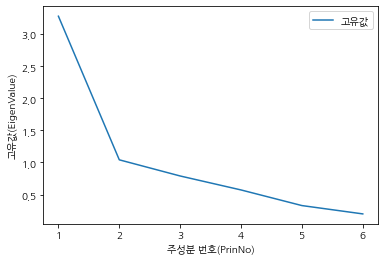

In [26]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")

plt.ylabel("고유값(EigenValue)")
plt.xlabel("주성분 번호(PrinNo)")
plt.legend(loc="best")

※ 주성분 번호 "2"선택 -> 주성분 갯수 2개 결정

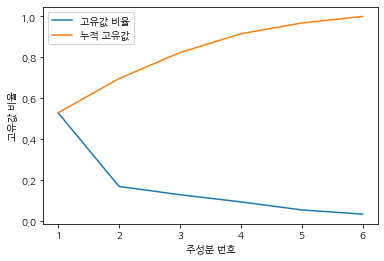

In [28]:
# 고유값 비율과 누적 고유값 입력
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="고유값 비율")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적 고유값")

plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

### 5) 고유벡터 확인 및 해석

In [30]:
# 주성분 분석 데이터의 변수 이름 저장
x_cols = pd.DataFrame({"Feature": df_raw_x.columns})

# 파이썬 PCA분석시 SVD(Singular value decomposition) 연산 방식의 차이 반영
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,
                           columns=["Prin1", "Prin2","Prin3",
                                      "Prin4","Prin5","Prin6"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


※ 고유값 확인 및 주성분 해석
- 1주성분은 CHANCE와 ADVANCE의 양의 상관석
- 2주성분은 불만처리와 특권 허용 간의 음의 연관성 확인

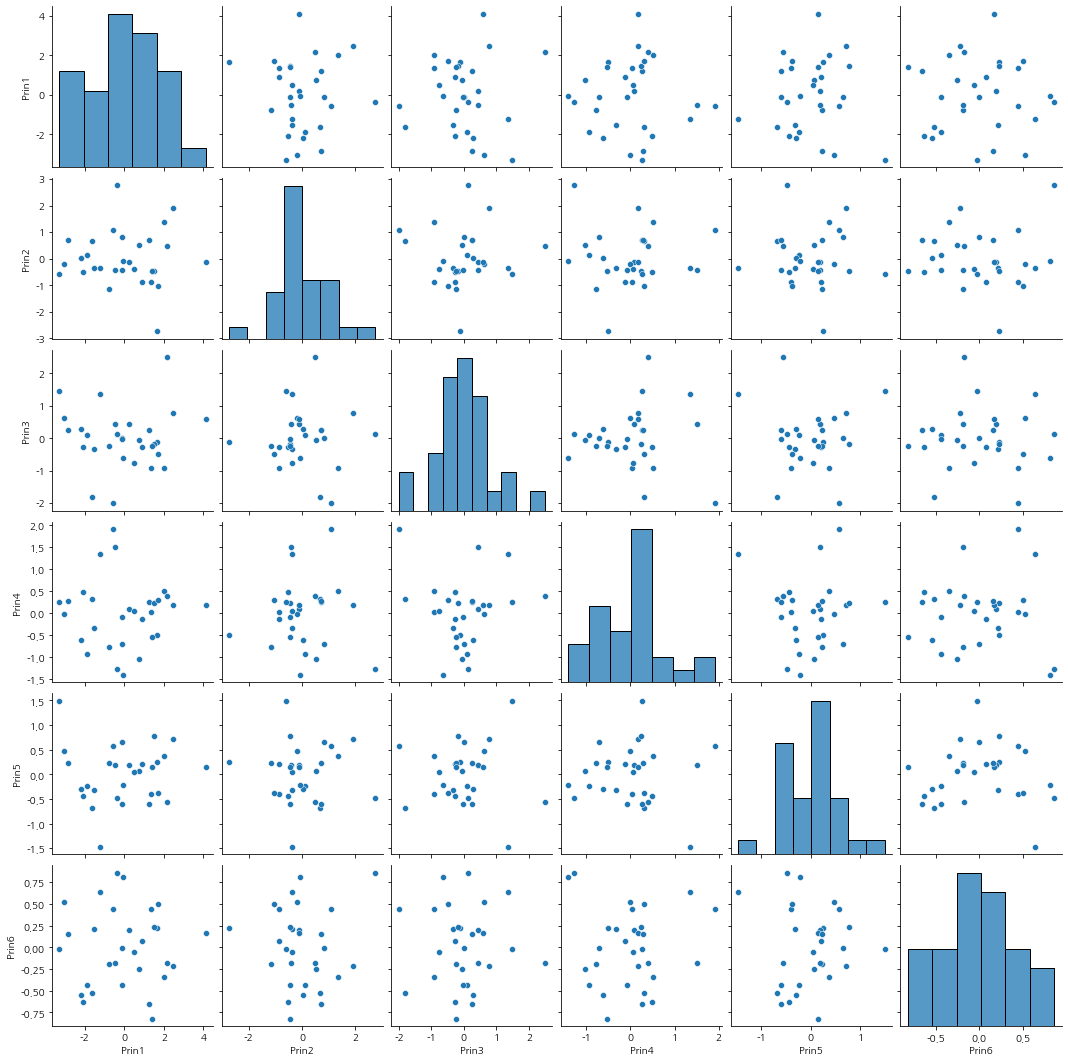

In [31]:
sns.pairplot(df_pca)

In [33]:
df_pca.corr().round(3)

# 주성분은 서로 독립적. 상관계수 = 0

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


## 5) 주성분 상관/회귀분석: 회귀분석

### 1) 다중선형 회귀분석: 원천 데이터 활용

In [35]:
# 원 데이터에 절편 추가
df_raw_x_const = sm.add_constant(df_raw_x)

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.24e-05
Time:                        15:18:37   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

- Adj-R^2는 66.3%의 적확도
- p-value가 높은게 있어 보인다.

### 2) Scale변환 데이터 활용

In [38]:
# 상수항 추가
df_scaled_const = sm.add_constant(df_scaled)

reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.24e-05
Time:                        15:21:17   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

### 3) 다중선형 주성분 회귀분석: 주성분 점수 데이터 활용

In [40]:
x_var = ["Prin1", "Prin2", "Prin3"]

In [41]:
df_scaled_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.02e-05
Time:                        15:22:32   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

- 변수 3개로 58%의 설명력을 갖는다. 단 P-value가 전부 유의미하게 나왔다.
- 전체 설명변수 이용한 모델보다 3개 주성분을 이용한 회귀모델의 설명력이 약 11% 저하되었다.
    - 기여율이 약한 주성분 3개르 제외하여 설명력 저하됨.
- 주성분 회귀분석의 회귀계수는 모두 유의하다.


- 만약 해석 시에는 주성분 분석한 것임을 고려해서 해석을 진행해야 한다.